In [21]:
# references
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# Deep learning book - http://www.deeplearningbook.org/
# Stanford class - https://cs231n.github.io/

# to add kernel to jupyter
# pip install jupyter
# ipython kernel install --name "env name"


In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
# import the required modules
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
%matplotlib inline 


In [23]:
# if unable to download because of proxy: 
# Download manually from https://s3.amazonaws.com/img-datasets/mnist.npz
# Move mnist.npz to .keras/datasets/ directory
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


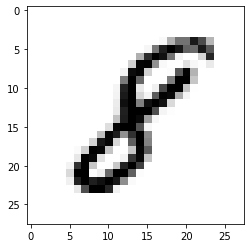

In [24]:
image_index = 7777
print(y_train[image_index]) # print image label
plt.imshow(x_train[image_index], cmap="Greys")

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
# reshaping the array to 4-dims to work with Keras API
img_rows = img_cols = 28
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# make sure values are floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize the image values
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of iamges in x_train:', x_train.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of iamges in x_train: 60000


In [27]:
# create sequential model and add layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [29]:
# compile and fit the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.2031 - accuracy: 0.9382
Epoch 2/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0825 - accuracy: 0.9744
Epoch 3/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.0584 - accuracy: 0.9819
Epoch 4/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0411 - accuracy: 0.9868
Epoch 5/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.0347 - accuracy: 0.9882
Epoch 6/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0269 - accuracy: 0.9908
Epoch 7/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.0224 - accuracy: 0.9921
Epoch 8/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0216 - accuracy: 0.9922
Epoch 9/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0186 - accuracy: 0.9937
Epoch 10/10
60000/60000 [==================

In [30]:
# evaluate the model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 87us/step


[0.05923805165151084, 0.9848999977111816]

pred score: 4
pred: [[7.2665394e-12 1.3067153e-13 4.6081051e-12 4.0602985e-12 9.9999082e-01
  5.2031157e-12 2.1119859e-09 1.0348183e-11 2.6353464e-13 9.1984875e-06]]


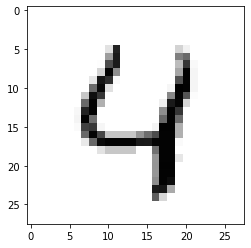

In [31]:
image_index = 4
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(f'pred score: {pred.argmax()}')
print(f'pred: {pred}')

In [32]:
# use another convnet from
# Deep learning with python

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2,2,)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2,2,)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [33]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [34]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model1.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.1773 - accuracy: 0.9442
Epoch 2/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.0474 - accuracy: 0.9851
Epoch 3/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.0333 - accuracy: 0.9898
Epoch 4/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.0254 - accuracy: 0.9922
Epoch 5/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.0194 - accuracy: 0.9941


In [35]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print(f'test loss: {test_loss}')
print(f'test acc: {test_acc}')

10000/10000 [==============================] - 1s 104us/step
test loss: 0.027172041569490102
test acc: 0.9922999739646912


pred score: 6
pred: [[9.8832185e-11 2.5638702e-09 2.8258742e-16 6.5610397e-15 7.4631600e-08
  2.0244711e-08 9.9999988e-01 8.6936496e-13 7.7235364e-13 2.1554822e-12]]


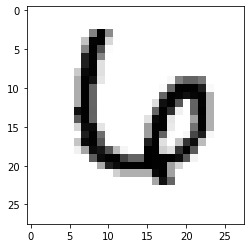

In [36]:
image_index = 4441
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model1.predict(x_test[image_index].reshape(1,28,28,1))
print(f'pred score: {pred.argmax()}')
print(f'pred: {pred}')